# Read dataset

In [15]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

## Read dataset from directory
dir_data = './data/'
raw_data = os.path.join(dir_data, 'breast-cancer-wisconsin.data')
data = np.genfromtxt(raw_data, delimiter=",", dtype=str)
label = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
              'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
              'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

# Put txt files into DataFrame

In [16]:
arrange_data = []
for line in data:
    arrange_data.append(line)

df = pd.DataFrame(arrange_data)
df.columns = label

# processing with missimg value
for className in df:
    for index in range(len(df[className])):
        if(df[className][index] == '?'):
            df[className][index] = df[className].mode()  # replace missing value with mode

df=df.astype({'Clump Thickness':'int32',
              'Uniformity of Cell Size':'int32',
              'Uniformity of Cell Shape':'int32',
              'Marginal Adhesion':'int32',
              'Single Epithelial Cell Size':'int32',
              'Bare Nuclei':'int32',
              'Bland Chromatin':'int32',
              'Normal Nucleoli':'int32',
              'Mitoses':'int32'})
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Split training data & testing data

In [17]:
bcw_data = df[df.columns[1:-1]]
bcw_label = df['Class']
train_data , test_data , train_label , test_label = train_test_split(bcw_data, bcw_label, test_size=0.33, stratify=bcw_label)

# KNN (K = 5)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(train_data,train_label)
pred = knn.predict(test_data)
accuracy = knn.score(test_data, test_label, sample_weight=None)

# Confusion matrix

In [19]:
print(confusion_matrix(test_label, pred))

[[145   6]
 [  3  77]]


# Prediction

In [20]:
print(classification_report(test_label, pred))
print("Accuracy: ", accuracy)

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       151
           4       0.93      0.96      0.94        80

   micro avg       0.96      0.96      0.96       231
   macro avg       0.95      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231

Accuracy:  0.961038961038961


# Compare the accuracy with different values of K

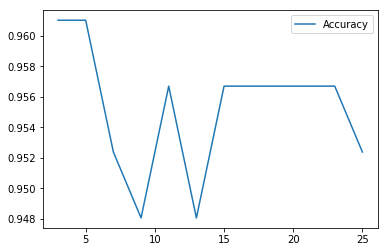

In [21]:
K_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
K_accuracy = []
for value in K_values:
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(train_data,train_label)
    K_accuracy.append(knn.score(test_data, test_label, sample_weight=None))

plt.plot(K_values, K_accuracy, label="Accuracy")
plt.legend()
plt.show()